<a href="https://colab.research.google.com/github/HarryGateaux/PyTorchLearning/blob/master/PixelNeuralNetworkLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import resources
%matplotlib inline

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import torch
from torchvision import transforms, models
import torch.nn as nn
import ipywidgets as widgets


Define the Model


In [0]:
class PixelNN(nn.Module):
  def __init__(self, nHidden,  sizeHidden, activationType):
    super().__init__()
    self.fc_in = nn.Linear(2, sizeHidden)
    self.fc_hidden = nn.Linear(sizeHidden, sizeHidden)
    self.hiddenList = nn.ModuleList([nn.Linear(sizeHidden, sizeHidden) for i in range(nHidden)])
    self.fc_out  = nn.Linear(sizeHidden, 3)

    act_dict = {'tanh' : nn.Tanh(),
                'sigmoid' : nn.Sigmoid(),
                'ReLU' : nn.ReLU(),
                'Leaky ReLU' : nn.LeakyReLU(),
                'SoftPlus' : nn.Softplus()
                }

    self.activation = act_dict[activationType]
    self.sigmoid = nn.Sigmoid()
    self.nHidden = nHidden


  def forward(self, x):

    x = self.fc_in(x)

    for hidden in self.hiddenList:
      x = self.activation(hidden(x))

    x = self.fc_out(x)

    x = self.sigmoid(x)

    return x


Create Model and Initialise the fully connected layer weights

In [0]:
#weight initialisation
def init_weights(m):
  if type(m) == nn.Linear:

      if initDropdown.value == 'normal':
        torch.nn.init.normal_(m.weight)
      if initDropdown.value == 'kaiming normal':
          torch.nn.init.kaiming_normal_(m.weight)
      if initDropdown.value == 'kaiming uniform':
          torch.nn.init.kaiming_uniform_(m.weight)
      if initDropdown.value == 'uniform':
          torch.nn.init.uniform_(m.weight)

      m.bias.data.fill_(biasSlider.value)

def createModel():

  dim = imageSlider.value
  nHidden = hiddenSlider.value
  sizeHidden = sizeSlider.value
  print(nHidden)

  model = PixelNN(nHidden, sizeHidden, actDropdown.value)
  model.apply(init_weights)
  return model, dim


Applying the model



In [0]:
def createImage(model, dim):

  pixels = (np.indices((dim, dim), dtype = np.float32))
  pixels = pixels.swapaxes(1, 2)
  pixels = pixels.transpose().reshape(-1,2) / dim  -0.5
  print(pixels.shape)
  pixels_torch  = torch.from_numpy(pixels)
  output = model(pixels_torch)
  output = output.reshape(dim,dim, 3)

  #output = output[:,:,1] #b&w

  print(output.shape)
  fig, axes = plt.subplots(1 , 2, figsize=(20, 10))


  axes[0].imshow(output[:,:,:3].detach().numpy())
  axes[1].hist(output[:,:,0].detach().numpy())

  print(f"Initialization : {initDropdown.value}")
  print(f"Min : {output.min()}\nMax : {output.max()}")
  return output



IntSlider(value=256, description='image width', max=1024, min=64, step=64, style=SliderStyle(description_width…

IntSlider(value=7, description='#hidden layers', max=20, style=SliderStyle(description_width='initial'))

IntSlider(value=16, description='#neurons', max=96, min=4, style=SliderStyle(description_width='initial'))

FloatSlider(value=0.0, description='initial bias', max=5.0, min=-5.0, step=0.25, style=SliderStyle(description…

Dropdown(description='initialisation type', options=('normal', 'haiming uniform', 'haiming normal', 'uniform')…

Dropdown(description='activation type', options=('tanh', 'sigmoid', 'ReLU', 'Leaky ReLU', 'SoftPlus'), style=D…

Button(description='Generate Image', style=ButtonStyle())

7
(65536, 2)
torch.Size([256, 256, 3])
Initialization : normal
Min : 1.018134116748115e-05
Max : 0.9999898672103882


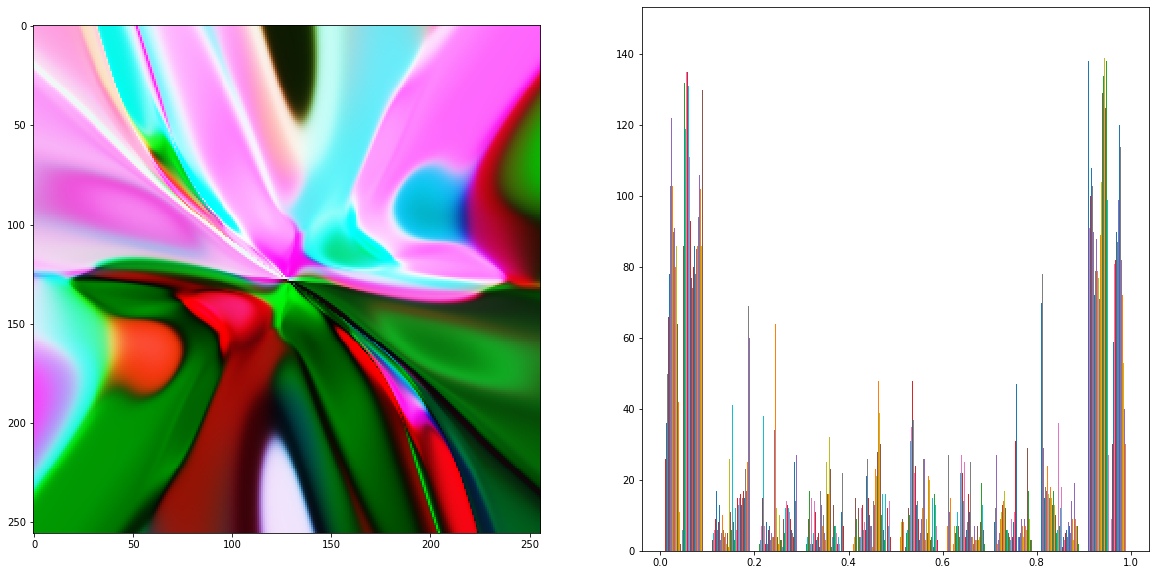

In [0]:
from IPython.display import clear_output

def btn_eventhandler(obj):

  global output
  clear_output()
  display(imageSlider, hiddenSlider, sizeSlider, biasSlider, initDropdown, actDropdown, btn)
  mod, w = createModel()
  output = createImage(mod, w)



style = {'description_width': 'initial'}

imageSlider = widgets.IntSlider(min=64, max=1024, step=64, description='image width', value=256, style = style)
hiddenSlider = widgets.IntSlider(min=0, max=20, step=1, description='#hidden layers', value=7, style = style)
sizeSlider = widgets.IntSlider(min=4, max=96, step=1, description='#neurons', value=16, style = style)
biasSlider = widgets.FloatSlider(min=-5, max=5, step=0.25, description='initial bias', value=0, style = style)
initDropdown = widgets.Dropdown(options = ['normal', 'haiming uniform', 'haiming normal', 'uniform'], description = "initialisation type" , style = style)
actDropdown = widgets.Dropdown(options = ['tanh', 'sigmoid', 'ReLU', 'Leaky ReLU', 'SoftPlus'], description = "activation type" , style = style)
btn = widgets.Button(description='Generate Image')

display(imageSlider, hiddenSlider, sizeSlider, biasSlider, initDropdown, actDropdown, btn)

btn.on_click(btn_eventhandler)
  